## Вычислительные методы
## Типовые расчеты, Вариант № 5

### Выполнил: 

### Студент группы А-02-22 Жихарев Д.С.

**Типовой расчет №13**

Коэффициенты многочлена 1-й степени: [-2.61428571 -4.86      ]
Среднеквадратичная погрешность для многочлена 1-й степени: 0.8406000000000005
Коэффициенты многочлена 2-й степени: [-0.33527697 -2.61428571 -4.53142857]
Среднеквадратичная погрешность для многочлена 2-й степени: 0.765028571428572


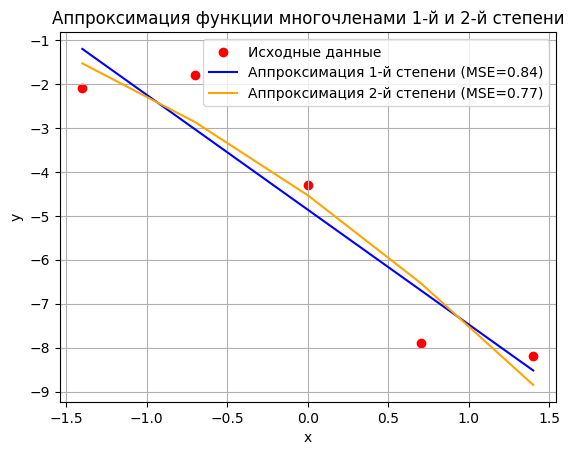

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Данные
x = np.array([-1.4, -0.7, 0, 0.7, 1.4])
y = np.array([-2.1, -1.8, -4.3, -7.9, -8.2])

# Аппроксимация многочленом 1-й степени (линейная регрессия)
coeffs_1 = np.polyfit(x, y, 1)
poly_1 = np.poly1d(coeffs_1)
y_approx_1 = poly_1(x)

# Аппроксимация многочленом 2-й степени
coeffs_2 = np.polyfit(x, y, 2)
poly_2 = np.poly1d(coeffs_2)
y_approx_2 = poly_2(x)

# Вычисление среднеквадратичной погрешности
mse_1 = np.mean((y - y_approx_1)**2)
mse_2 = np.mean((y - y_approx_2)**2)

# Печать коэффициентов и ошибок
print(f'Коэффициенты многочлена 1-й степени: {coeffs_1}')
print(f'Среднеквадратичная погрешность для многочлена 1-й степени: {mse_1}')

print(f'Коэффициенты многочлена 2-й степени: {coeffs_2}')
print(f'Среднеквадратичная погрешность для многочлена 2-й степени: {mse_2}')

# Построение графиков
plt.scatter(x, y, color='red', label='Исходные данные')
plt.plot(x, y_approx_1, label=f'Аппроксимация 1-й степени (MSE={mse_1:.2f})', color='blue')
plt.plot(x, y_approx_2, label=f'Аппроксимация 2-й степени (MSE={mse_2:.2f})', color='orange')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Аппроксимация функции многочленами 1-й и 2-й степени')
plt.legend()
plt.grid(True)
plt.show()

**Типовой расчет №14**

Коэффициенты a и b: a = 1.1999709070834867, b = 2.799912785288384
Среднеквадратичная погрешность: 5.542772191572847e-08


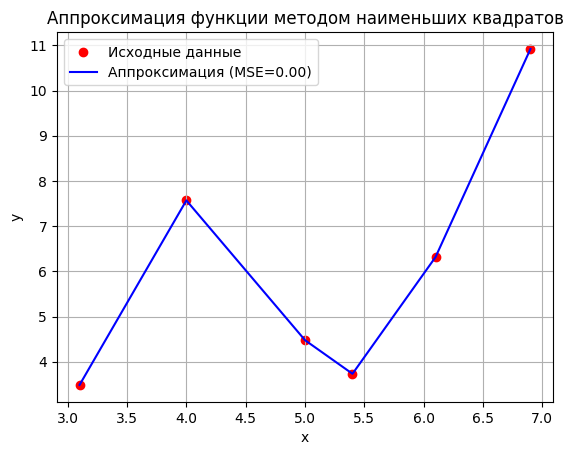

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Заданные данные
x = np.array([3.1, 4, 5, 5.4, 6.1, 6.9])
y = np.array([3.487, 7.57, 4.477, 3.733, 6.317, 10.922])

# Функции φ0(x) и φ1(x)
phi0 = x
phi1 = np.sin(2*x)

# Матрица A для системы нормальных уравнений
A = np.vstack([phi0, phi1]).T

# Решение системы уравнений методом наименьших квадратов
coeffs, _, _, _ = np.linalg.lstsq(A, y, rcond=None)
a, b = coeffs

# Вычисление аппроксимированных значений y
y_approx = a * phi0 + b * phi1

# Вычисление среднеквадратичной погрешности
mse = np.mean((y - y_approx)**2)

# Печать коэффициентов и ошибки
print(f'Коэффициенты a и b: a = {a}, b = {b}')
print(f'Среднеквадратичная погрешность: {mse}')

# Построение графиков
plt.scatter(x, y, color='red', label='Исходные данные')
plt.plot(x, y_approx, label=f'Аппроксимация (MSE={mse:.2f})', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Аппроксимация функции методом наименьших квадратов')
plt.legend()
plt.grid(True)
plt.show()


**Типовой расчет №15**

In [9]:
import numpy as np

# Исходные данные
x = np.array([-3, -2, -1, 0])
y = np.array([-1, -4, 0, -5])
x_tilde = -2.18

# Интерполяционный многочлен Лагранжа
def lagrange_interpolation_polynomial(x, y):
    n = len(x)
    poly = ''
    for k in range(n):
        term = str(y[k])
        for i in range(n):
            if i != k:
                term += f' * (x - {x[i]}) / ({x[k]} - {x[i]})'
        poly += term
        if k != n-1:
            poly += ' + '
    return poly

# Интерполяционный многочлен Ньютона
def newton_interpolation_polynomial(x, y):
    n = len(x)
    divided_diff = np.zeros((n, n))
    divided_diff[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            divided_diff[i, j] = (divided_diff[i + 1, j - 1] - divided_diff[i, j - 1]) / (x[i + j] - x[i])

    poly = str(y[0])
    for j in range(1, n):
        term = str(divided_diff[0, j])
        for i in range(j):
            term += f' * (x - {x[i]})'
        poly += ' + ' + term
    return poly

# Функция для вычисления значения многочлена в точке
def evaluate_polynomial(poly, x_val):
    return eval(poly.replace('x', str(x_val)))

# Вывод интерполяционных многочленов
print('Интерполяционный многочлен в форме Лагранжа:')
print('P(x) =', lagrange_interpolation_polynomial(x, y))
print('Приближенное значение в точке x =', x_tilde, ':', evaluate_polynomial(lagrange_interpolation_polynomial(x, y), x_tilde))
print()

print('Интерполяционный многочлен в форме Ньютона:')
print('N(x) =', newton_interpolation_polynomial(x, y))
print('Приближенное значение в точке x =', x_tilde, ':', evaluate_polynomial(newton_interpolation_polynomial(x, y), x_tilde))


Интерполяционный многочлен в форме Лагранжа:
P(x) = -1 * (x - -2) / (-3 - -2) * (x - -1) / (-3 - -1) * (x - 0) / (-3 - 0) + -4 * (x - -3) / (-2 - -3) * (x - -1) / (-2 - -1) * (x - 0) / (-2 - 0) + 0 * (x - -3) / (-1 - -3) * (x - -2) / (-1 - -2) * (x - 0) / (-1 - 0) + -5 * (x - -3) / (0 - -3) * (x - -2) / (0 - -2) * (x - -1) / (0 - -1)
Приближенное значение в точке x = -2.18 : -4.441048

Интерполяционный многочлен в форме Ньютона:
N(x) = -1 + -3.0 * (x - -3) + 3.5 * (x - -3) * (x - -2) + -2.6666666666666665 * (x - -3) * (x - -2) * (x - -1)
Приближенное значение в точке x = -2.18 : -4.441048


**Типовой расчет №16**

In [10]:
import numpy as np

# Исходные данные
x = np.array([2, 2.4, 3.2, 4, 4.8])
y = np.array([6.4, 8.3, 13, 19, 26.2])
x_tilde = 3.42

# Переупорядочивание таблицы в порядке удаления от x_tilde
distances = np.abs(x - x_tilde)
sorted_indices = np.argsort(distances)
x = x[sorted_indices]
y = y[sorted_indices]

# Вычисление разделенных разностей
def divided_differences(x, y):
    n = len(x)
    diff_table = np.zeros((n, n))
    diff_table[:, 0] = y
    
    for j in range(1, n):
        for i in range(n - j):
            diff_table[i, j] = (diff_table[i + 1, j - 1] - diff_table[i, j - 1]) / (x[i + j] - x[i])
    
    return diff_table

diff_table = divided_differences(x, y)

# Построение интерполяционных многочленов Ньютона
def newton_polynomial(x, diff_table, x_val, degree):
    n = degree + 1
    result = diff_table[0, 0]
    product_term = 1
    
    for k in range(1, n):
        product_term *= (x_val - x[k - 1])
        result += diff_table[0, k] * product_term
    
    return result

# Вычисление приближенных значений
y_approx_1st = newton_polynomial(x, diff_table, x_tilde, 1)
y_approx_2nd = newton_polynomial(x, diff_table, x_tilde, 2)
y_approx_3rd = newton_polynomial(x, diff_table, x_tilde, 3)

# Практическая оценка погрешности
def practical_error(y_approx_low, y_approx_high):
    return np.abs(y_approx_high - y_approx_low)

error_1st = practical_error(y_approx_1st, y_approx_2nd)
error_2nd = practical_error(y_approx_2nd, y_approx_3rd)

# Вывод результатов
print(f'Приближенное значение функции в точке x = {x_tilde} с помощью интерполяционного многочлена Ньютона первой степени: {y_approx_1st}')
print(f'Приближенное значение функции в точке x = {x_tilde} с помощью интерполяционного многочлена Ньютона второй степени: {y_approx_2nd}')
print(f'Приближенное значение функции в точке x = {x_tilde} с помощью интерполяционного многочлена Ньютона третьей степени: {y_approx_3rd}')

print(f'\nПрактическая оценка погрешности для интерполяционного многочлена первой степени: ±{error_1st}')
print(f'Практическая оценка погрешности для интерполяционного многочлена второй степени: ±{error_2nd}')


Приближенное значение функции в точке x = 3.42 с помощью интерполяционного многочлена Ньютона первой степени: 14.649999999999999
Приближенное значение функции в точке x = 3.42 с помощью интерполяционного многочлена Ньютона второй степени: 14.520406249999999
Приближенное значение функции в точке x = 3.42 с помощью интерполяционного многочлена Ньютона третьей степени: 14.52464296875

Практическая оценка погрешности для интерполяционного многочлена первой степени: ±0.12959374999999973
Практическая оценка погрешности для интерполяционного многочлена второй степени: ±0.004236718750000534


**Типовой расчет №20**

In [11]:
import numpy as np

def f(x):
    return np.exp(0.6 / (x * np.sqrt(x)))

a = 2
b = 3.6

# Метод центральных прямоугольников
h = 0.4
n = int((b - a) / h)
x_central = [a + (i + 0.5) * h for i in range(n)]
integral_central_rectangles = h * sum(f(x) for x in x_central)

# Метод трапеций с шагом 0.4
x_trapezoids_0_4 = [a + i * h for i in range(n + 1)]
integral_trapezoids_0_4 = (h / 2) * (f(a) + 2 * sum(f(x) for x in x_trapezoids_0_4[1:-1]) + f(b))

# Метод трапеций с шагом 0.2
h = 0.2
n = int((b - a) / h)
x_trapezoids_0_2 = [a + i * h for i in range(n + 1)]
integral_trapezoids_0_2 = (h / 2) * (f(a) + 2 * sum(f(x) for x in x_trapezoids_0_2[1:-1]) + f(b))

# Метод трапеций с шагом 0.1
h = 0.1
n = int((b - a) / h)
x_trapezoids_0_1 = [a + i * h for i in range(n + 1)]
integral_trapezoids_0_1 = (h / 2) * (f(a) + 2 * sum(f(x) for x in x_trapezoids_0_1[1:-1]) + f(b))

# Оценка погрешности по правилу Рунге для метода трапеций
error_trapezoids = (integral_trapezoids_0_1 - integral_trapezoids_0_2) / 3
integral_trapezoids_refined = integral_trapezoids_0_2 + error_trapezoids

# Метод Симпсона с шагом 0.4
h = 0.4
n = int((b - a) / h)
x_simpson = [a + i * h for i in range(n + 1)]
integral_simpson = (h / 3) * (f(a) + 4 * sum(f(x_simpson[i]) for i in range(1, n, 2)) + 2 * sum(f(x_simpson[i]) for i in range(2, n-1, 2)) + f(b))

# Вывод результатов
print(f'Приближенное значение интеграла методом центральных прямоугольников: {integral_central_rectangles:.6f}')
print(f'Приближенное значение интеграла методом трапеций с шагом 0.4: {integral_trapezoids_0_4:.6f}')
print(f'Приближенное значение интеграла методом трапеций с шагом 0.2: {integral_trapezoids_0_2:.6f}')
print(f'Приближенное значение интеграла методом трапеций с шагом 0.1: {integral_trapezoids_0_1:.6f}')
print(f'Оценка погрешности для метода трапеций с шагом 0.2: ±{error_trapezoids:.6f}')
print(f'Уточненное значение интеграла методом трапеций с шагом 0.2: {integral_trapezoids_refined:.6f}')
print(f'Приближенное значение интеграла методом Симпсона: {integral_simpson:.6f}')



Приближенное значение интеграла методом центральных прямоугольников: 1.831425
Приближенное значение интеграла методом трапеций с шагом 0.4: 1.834526
Приближенное значение интеграла методом трапеций с шагом 0.2: 1.832975
Приближенное значение интеграла методом трапеций с шагом 0.1: 1.832585
Оценка погрешности для метода трапеций с шагом 0.2: ±-0.000130
Уточненное значение интеграла методом трапеций с шагом 0.2: 1.832845
Приближенное значение интеграла методом Симпсона: 1.832519


**Типовой расчет №21**

In [13]:
import numpy as np

def f(x):
    return 1 + 4 * x + 4 * x**2 - 1 * x**3 + 1 * x**4

def f_prime_prime(x):
    return 12 * x**2 -6 * x + 8

a = 0
b = 0.5
epsilon = 0.01

# Шаг 1: Найдем максимум модуля второй производной на отрезке [a, b]
x_vals = np.linspace(a, b, 1000)
max_f_prime_prime = max(abs(f_prime_prime(x)) for x in x_vals)

# Шаг 2: Определим количество шагов n, необходимое для достижения точности epsilon
n = int(np.ceil(((b - a) ** 3 * max_f_prime_prime) / (12 * epsilon)) ** 0.5)

# Шаг интегрирования
h = (b - a) / n

# Метод трапеций
x = np.linspace(a, b, n + 1)
y = f(x)
integral_trapezoidal = h * (0.5 * y[0] + sum(y[1:-1]) + 0.5 * y[-1])

# Точное значение интеграла
def antiderivative(x):
    return (x**5)/5 - (x**4)/4 + (4 * x**3)/3 + 2 * x**2 + x

exact_integral = antiderivative(b) - antiderivative(a)

# Вывод результатов
print(f'Приближенное значение интеграла методом трапеций: {integral_trapezoidal:.6f}')
print(f'Точное значение интеграла: {exact_integral:.6f}')
print(f'Разница: {abs(integral_trapezoidal - exact_integral):.6f}')
print(f'Требуемая точность достигнута: {abs(integral_trapezoidal - exact_integral) <= epsilon}')


Приближенное значение интеграла методом трапеций: 1.165959
Точное значение интеграла: 1.157292
Разница: 0.008668
Требуемая точность достигнута: True


**Типовой расчет №23**

In [14]:
import numpy as np

# Определение функции
def f(x):
    return np.exp(0.6 / (x * np.sqrt(x)))

# Первая производная функции
def f_prime(x):
    return -(9*np.exp(3/(5*x**(3/2))))/(10*x**(5/2))

# Вторая производная функции
def f_double_prime(x):
    return (225*x**2*np.exp(3/(5*x**(3/2)))+81*np.sqrt(x)*np.exp(3/(5*x**(3/2))))/(100*x**(11/2))

# Параметры
a = 2
b = 3.6
h = 0.1

# Точка x0
x0 = (a + b) / 2

# Значения функции в необходимых точках
f_x0 = f(x0)
f_x0_h = f(x0 + h)
f_x0_minus_h = f(x0 - h)
f_x0_plus_2h = f(x0 + 2*h)
f_x0_minus_2h = f(x0 - 2*h)

# Центральная разностная производная
central_diff = (f_x0_h - f_x0_minus_h) / (2 * h)

# Левая разностная производная
left_diff = (f_x0 - f_x0_minus_h) / h

# Вторая разностная производная
second_diff = (f_x0_h - 2 * f_x0 + f_x0_minus_h) / (h**2)

# Точные значения производных
exact_first_derivative = f_prime(x0)
exact_second_derivative = f_double_prime(x0)

# Вывод результатов
print(f'Центральная разностная производная: {central_diff:.6f}')
print(f'Левая разностная производная: {left_diff:.6f}')
print(f'Вторая разностная производная: {second_diff:.6f}')
print(f'Точное значение первой производной: {exact_first_derivative:.6f}')
print(f'Точное значение второй производной: {exact_second_derivative:.6f}')

# Сравнение приближений с точными значениями
print(f'Ошибка центральной разностной производной: {abs(central_diff - exact_first_derivative):.6f}')
print(f'Ошибка левой разностной производной: {abs(left_diff - exact_first_derivative):.6f}')
print(f'Ошибка второй разностной производной: {abs(second_diff - exact_second_derivative):.6f}')


Центральная разностная производная: -0.078146
Левая разностная производная: -0.081902
Вторая разностная производная: 0.075120
Точное значение первой производной: -0.077976
Точное значение второй производной: 0.074971
Ошибка центральной разностной производной: 0.000170
Ошибка левой разностной производной: 0.003926
Ошибка второй разностной производной: 0.000149


**Типовой расчет №24**

Метод Эйлера:
t-values: [0.  0.2 0.4 0.6 0.8]
y-values: [1.         1.         0.96374615 0.90506093 0.83381107]
Errors: [0.         0.         0.07124986]

Метод Рунге-Кутты 2-го порядка:
t-values: [0.  0.2 0.4 0.6 0.8]
y-values: [1.         0.98096748 0.93618237 0.87556927 0.80630763]
Errors: [0.00634417 0.         0.02308721]


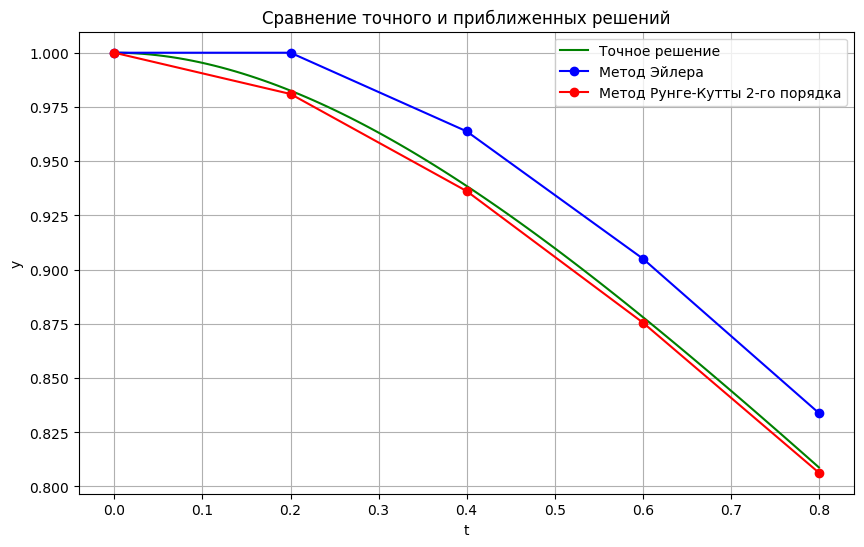

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Определение функции f(t, y)
def f(t, y):
    return -y + np.exp(-t)

# Точное решение для сравнения
def exact_solution(t):
    sol = solve_ivp(f, [0, interval[1]], [1], t_eval=[t], method='RK45')
    return sol.y[0][-1]  # Возвращаем последнее значение решения

# Параметры задачи
t0 = 0
y0 = 1
h = 0.2
interval = [t0, t0 + 0.8]
n_steps = int((interval[1] - t0) / h) + 1

# Метод Эйлера
t_euler = np.linspace(t0, interval[1], n_steps)
y_euler = np.zeros(n_steps)
y_euler[0] = y0
for i in range(1, n_steps):
    y_euler[i] = y_euler[i-1] + h * f(t_euler[i-1], y_euler[i-1])

# Метод Рунге-Кутты 2-го порядка
t_rk2 = np.linspace(t0, interval[1], n_steps)
y_rk2 = np.zeros(n_steps)
y_rk2[0] = y0
for i in range(1, n_steps):
    k1 = h * f(t_rk2[i-1], y_rk2[i-1])
    k2 = h * f(t_rk2[i-1] + h/2, y_rk2[i-1] + k1/2)
    y_rk2[i] = y_rk2[i-1] + k2

# Точное решение
t_exact = np.linspace(t0, interval[1], 100)
y_exact = [exact_solution(t) for t in t_exact]

# Оценка погрешности по правилу Рунге
def runge_estimate(y_h, y_half, p=1):
    min_length = min(len(y_h), len(y_half))
    return np.abs(y_h[:min_length] - y_half[:min_length]) / (2**p - 1)

# Оценка погрешности метода Эйлера
error_euler = runge_estimate(y_euler[1:], y_euler[::2])

# Оценка погрешности метода Рунге-Кутты второго порядка
error_rk2 = runge_estimate(y_rk2[1:], y_rk2[::2], p=2)


# Печать результатов
print("Метод Эйлера:")
print("t-values:", t_euler)
print("y-values:", y_euler)
print("Errors:", error_euler)

print("\nМетод Рунге-Кутты 2-го порядка:")
print("t-values:", t_rk2)
print("y-values:", y_rk2)
print("Errors:", error_rk2)

# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(t_exact, y_exact, 'g-', label='Точное решение')
plt.plot(t_euler, y_euler, 'bo-', label='Метод Эйлера')
plt.plot(t_rk2, y_rk2, 'ro-', label='Метод Рунге-Кутты 2-го порядка')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.title('Сравнение точного и приближенных решений')
plt.grid(True)
plt.show()


**Типовой расчет №27**

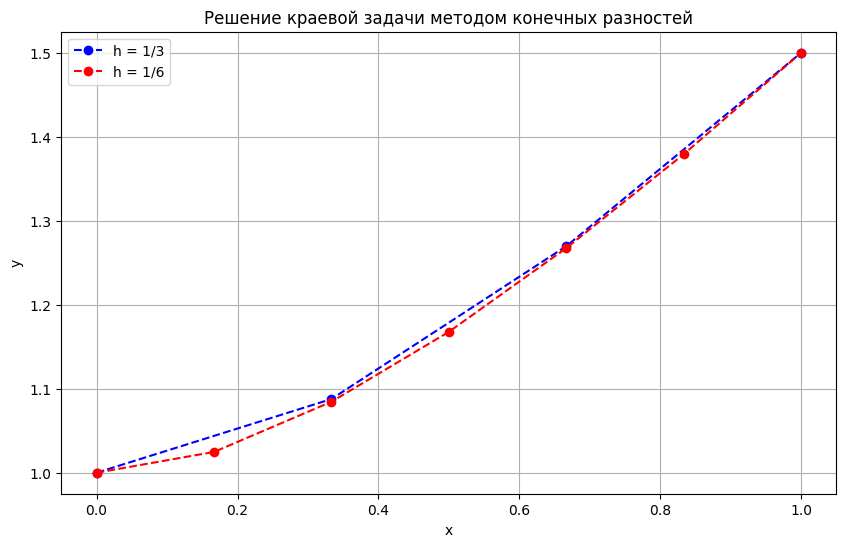

Погрешности по правилу Рунге для h1 = 1/3 и h2 = 1/6: [ 1.18423789e-15 -1.06905350e-03 -7.50851310e-04  0.00000000e+00]
Приближенные разностные производные для h1 = 1/3: [0.40460526 0.61842105]
Приближенные разностные производные для h2 = 1/6: [0.25353641 0.42903015 0.54891645 0.63442879 0.69754714]


In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Заданные параметры
y0, y1 = 1, 3/2

def f(x):
    return (2 * x)/((x+1)**2)

# Формирование матриц и векторов для метода конечных разностей
def finite_difference_method(h):
    N = int(1 / h)
    x = np.linspace(0, 1, N+1)
    A = np.zeros((N+1, N+1))
    b = np.zeros(N+1)
    q = 2/((1+x)**2)

    # Граничные условия
    A[0, 0], b[0] = 1, y0
    A[-1, -1], b[-1] = 1, y1
    # Заполнение матрицы A и вектора b
    for i in range(1, N):
        A[i, i-1] = -1 / h**2
        A[i, i] = 2 / h**2 + q[i]
        A[i, i+1] = -1 / h**2
        b[i] = f(x[i])

    # Решение системы уравнений
    y = np.linalg.solve(A, b)
    return x, y

# Вычисление решений на двух сетках
x_h1, y_h1 = finite_difference_method(1/3)
x_h2, y_h2 = finite_difference_method(1/6)

# Оценка погрешности по правилу Рунге
def runge_error(y_coarse, y_fine, factor):
    return (y_fine[::factor] - y_coarse) / (factor**2 - 1)

# Поскольку шаги h1 и h2 кратны, фактор равен h1/h2
factor = int((1/3) / (1/6))
error_runge = runge_error(y_h1, y_h2, factor)

# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(x_h1, y_h1, 'bo--', label='h = 1/3')
plt.plot(x_h2, y_h2, 'ro--', label='h = 1/6')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Решение краевой задачи методом конечных разностей')
plt.legend()
plt.grid(True)
plt.show()

# Вывод погрешностей
print("Погрешности по правилу Рунге для h1 = 1/3 и h2 = 1/6:", error_runge)

# Приближенные разностные производные
def approximate_derivative(y, h):
    return (y[2:] - y[:-2]) / (2*h)

derivative_h1 = approximate_derivative(y_h1, 1/3)
derivative_h2 = approximate_derivative(y_h2, 1/6)

print("Приближенные разностные производные для h1 = 1/3:", derivative_h1)
print("Приближенные разностные производные для h2 = 1/6:", derivative_h2)
